In [127]:
import wandb
import math
import torch
import torchcde
import glob
from tqdm import tqdm
import seaborn as sns
import numpy as np 
from matplotlib import pyplot as plt
import os
from pathlib import Path
from scipy.io import loadmat 
import time 
from model import *
from data import *

In [128]:
from scipy.io import loadmat 

In [129]:
data_root = '/mnt/vol6t/Projects/NeuralCDE/T1_mapping/registered_dataset'
data_file = '5779563_20140205_MOLLI_pre_groupwise.mat'
data = loadmat(data_root + '/' + data_file)
#data = loadmat_wrapper_with_contour(os.path.join(data_root, data_file), 0)

In [130]:
data['T1'].shape

(240, 240, 3)

In [131]:
# generate inference data numpy
data_root = '/mnt/vol6t/Projects/NeuralCDE/T1_mapping/registered_dataset'
data_files = glob.glob(data_root + '/*org.pt')

In [7]:
for i in tqdm(data_files):
    for j in range(3):
        data = loadmat_wrapper_with_contour_org(i, j)
        if data['volume'] is None:
            continue
        else:
            torch.save(data, i[:-4] + '_slice' + str(j) + '_org.pt')

 10%|▉         | 10/102 [00:05<00:50,  1.83it/s]

invalid slice index, return None


 17%|█▋        | 17/102 [00:09<00:47,  1.78it/s]

invalid slice index, return None
invalid slice index, return None


 19%|█▊        | 19/102 [00:10<00:40,  2.07it/s]

invalid slice index, return None


 21%|██        | 21/102 [00:11<00:34,  2.35it/s]

invalid slice index, return None


 25%|██▍       | 25/102 [00:13<00:31,  2.46it/s]

invalid slice index, return None
invalid slice index, return None


 26%|██▋       | 27/102 [00:14<00:34,  2.17it/s]

invalid slice index, return None


 31%|███▏      | 32/102 [00:16<00:35,  2.00it/s]

invalid slice index, return None


 33%|███▎      | 34/102 [00:17<00:28,  2.36it/s]

invalid slice index, return None
invalid slice index, return None


 38%|███▊      | 39/102 [00:21<00:43,  1.45it/s]

invalid slice index, return None


 42%|████▏     | 43/102 [00:23<00:35,  1.65it/s]

invalid slice index, return None
invalid slice index, return None


 46%|████▌     | 47/102 [00:26<00:26,  2.05it/s]

invalid slice index, return None
invalid slice index, return None


 70%|██████▉   | 71/102 [00:40<00:14,  2.07it/s]

invalid slice index, return None
invalid slice index, return None


 71%|███████   | 72/102 [00:40<00:12,  2.48it/s]

invalid slice index, return None


 73%|███████▎  | 74/102 [00:41<00:11,  2.47it/s]

invalid slice index, return None


 76%|███████▋  | 78/102 [00:43<00:10,  2.25it/s]

invalid slice index, return None
invalid slice index, return None


 78%|███████▊  | 80/102 [00:44<00:10,  2.20it/s]

invalid slice index, return None


 84%|████████▍ | 86/102 [00:47<00:08,  1.79it/s]

invalid slice index, return None


 86%|████████▋ | 88/102 [00:48<00:06,  2.18it/s]

invalid slice index, return None
invalid slice index, return None


 89%|████████▉ | 91/102 [00:49<00:04,  2.24it/s]

invalid slice index, return None
invalid slice index, return None


 91%|█████████ | 93/102 [00:51<00:04,  1.97it/s]

invalid slice index, return None


 95%|█████████▌| 97/102 [00:53<00:02,  1.86it/s]

invalid slice index, return None
invalid slice index, return None


100%|██████████| 102/102 [00:57<00:00,  1.78it/s]


In [132]:
data_root = '/mnt/vol6t/Projects/NeuralCDE/T1_mapping/registered_dataset'
data_files = glob.glob(data_root + '/*org.pt')


In [134]:
data_files

['/mnt/vol6t/Projects/NeuralCDE/T1_mapping/registered_dataset/9353628_20140129_MOLLI_pre_groupwise_slice0_org.pt',
 '/mnt/vol6t/Projects/NeuralCDE/T1_mapping/registered_dataset/9353628_20140129_MOLLI_pre_groupwise_slice1_org.pt',
 '/mnt/vol6t/Projects/NeuralCDE/T1_mapping/registered_dataset/9353628_20140129_MOLLI_pre_groupwise_slice2_org.pt',
 '/mnt/vol6t/Projects/NeuralCDE/T1_mapping/registered_dataset/9354444_20131120_MOLLI_pre_groupwise_slice0_org.pt',
 '/mnt/vol6t/Projects/NeuralCDE/T1_mapping/registered_dataset/9354444_20131120_MOLLI_pre_groupwise_slice1_org.pt',
 '/mnt/vol6t/Projects/NeuralCDE/T1_mapping/registered_dataset/9354444_20131120_MOLLI_pre_groupwise_slice2_org.pt',
 '/mnt/vol6t/Projects/NeuralCDE/T1_mapping/registered_dataset/9363066_20140326_MOLLI_pre_groupwise_slice0_org.pt',
 '/mnt/vol6t/Projects/NeuralCDE/T1_mapping/registered_dataset/9363066_20140326_MOLLI_pre_groupwise_slice1_org.pt',
 '/mnt/vol6t/Projects/NeuralCDE/T1_mapping/registered_dataset/9363066_20140326_M

# Archived

In [169]:
data = torch.load(data_files[10])

In [170]:
per_pixel_maximum = []
for i in data['volume'].reshape(-1,11):
    per_pixel_maximum.append(np.max(i))

(array([1.8883e+04, 1.6450e+03, 6.7000e+02, 5.3100e+02, 3.7800e+02,
        4.3800e+02, 5.3700e+02, 6.7600e+02, 6.2300e+02, 7.2900e+02,
        8.4500e+02, 8.3800e+02, 9.8200e+02, 1.1020e+03, 1.1930e+03,
        1.6170e+03, 1.4980e+03, 1.4210e+03, 1.3630e+03, 1.2200e+03,
        1.0500e+03, 9.6700e+02, 9.1600e+02, 8.1400e+02, 7.5300e+02,
        6.6200e+02, 6.1600e+02, 5.8200e+02, 6.1600e+02, 6.8900e+02,
        5.9100e+02, 5.1400e+02, 4.3400e+02, 3.5400e+02, 3.2300e+02,
        2.5600e+02, 2.1800e+02, 1.8800e+02, 1.7500e+02, 1.7000e+02,
        1.6500e+02, 1.5900e+02, 1.4700e+02, 9.4000e+01, 1.2000e+02,
        9.7000e+01, 7.8000e+01, 7.3000e+01, 6.4000e+01, 6.3000e+01,
        4.8000e+01, 6.4000e+01, 5.0000e+01, 5.4000e+01, 3.6000e+01,
        3.6000e+01, 5.3000e+01, 4.5000e+01, 5.5000e+01, 4.4000e+01,
        4.6000e+01, 4.4000e+01, 4.3000e+01, 3.5000e+01, 2.5000e+01,
        3.2000e+01, 2.6000e+01, 2.5000e+01, 2.9000e+01, 3.0000e+01,
        2.4000e+01, 2.8000e+01, 2.0000e+01, 1.20

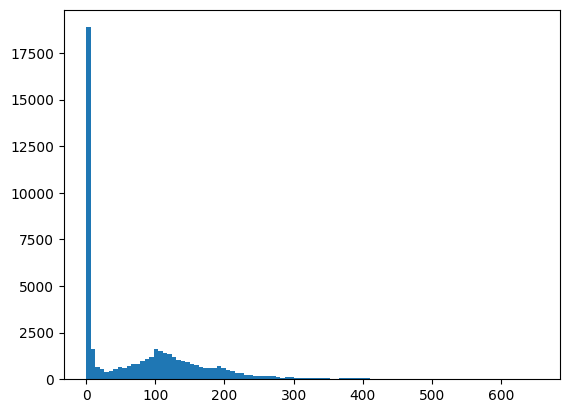

In [171]:
plt.hist(per_pixel_maximum, bins = 100)

In [161]:
t_inv = []
max_intensity = []
min_intensity = []
for i in tqdm(data_files):
    data = torch.load(i)
    t_inv.append(data['tvec'])
    max_intensity.append(np.max(data['volume']))
    min_intensity.append(np.mean(data['volume']))
    

100%|██████████| 275/275 [00:06<00:00, 43.70it/s]


In [139]:
np.array(max_intensity).min()

303.9954833984375

(array([ 31., 100.,  80.,  32.,  17.,   5.,   2.,   2.,   2.,   4.]),
 array([ 303.9954834 ,  447.33935547,  590.68322754,  734.02709961,
         877.37097168, 1020.71484375, 1164.05871582, 1307.40258789,
        1450.74645996, 1594.09033203, 1737.4342041 ]),
 <BarContainer object of 10 artists>)

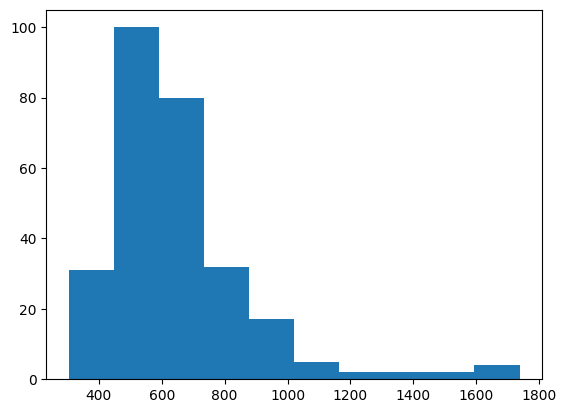

In [140]:
plt.hist(max_intensity)

(array([21., 36., 48., 65., 56., 27., 14.,  4.,  2.,  2.]),
 array([ 39.37812517,  47.81795657,  56.25778798,  64.69761938,
         73.13745078,  81.57728219,  90.01711359,  98.45694499,
        106.8967764 , 115.3366078 , 123.7764392 ]),
 <BarContainer object of 10 artists>)

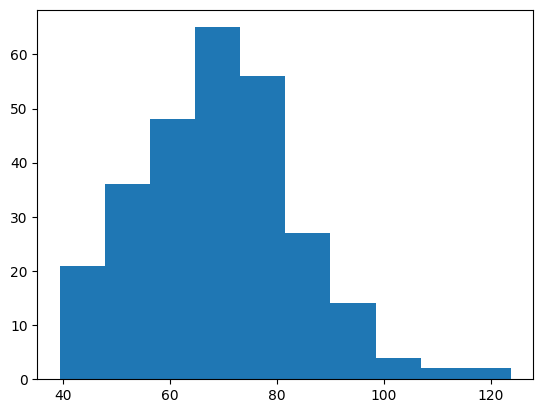

In [162]:
plt.hist(min_intensity)

In [113]:
t_inv_stacked = np.stack(t_inv)

In [117]:
for i in range(11):
    print(t_inv_stacked[:,i].mean(), t_inv_stacked[:,i].std(), np.median(t_inv_stacked[:,i]))

137.78545454545454 9.238327636572604 137.0
992.0945454545455 395.9806861305608 1029.0
1830.1563636363637 726.5246595986669 1940.0
352.4836363636364 266.4937909995697 243.0
1216.8036363636363 438.50183537032143 1165.0
2051.767272727273 668.2411135496053 2043.0
571.2290909090909 543.8838598192641 350.0
1411.530909090909 358.2298525059662 1307.0
2262.632727272727 401.92425295165236 2211.0
3213.28 632.4581522340214 3124.0
4197.538181818182 922.7266597113951 4056.0


(array([12., 55., 49., 53., 31., 35., 21.,  6.,  5.,  0.,  1.,  1.,  3.,
         0.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([2814. , 3170.1, 3526.2, 3882.3, 4238.4, 4594.5, 4950.6, 5306.7,
        5662.8, 6018.9, 6375. , 6731.1, 7087.2, 7443.3, 7799.4, 8155.5,
        8511.6, 8867.7, 9223.8, 9579.9, 9936. ]),
 <BarContainer object of 20 artists>)

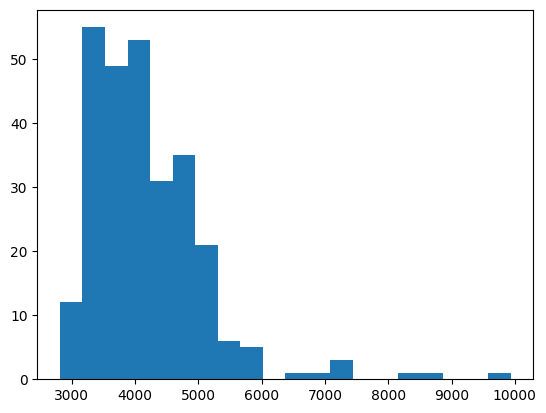

In [121]:
plt.hist(t_inv_stacked[:,10], bins=20)

In [4]:
data['volume'].shape

(240, 240, 11)

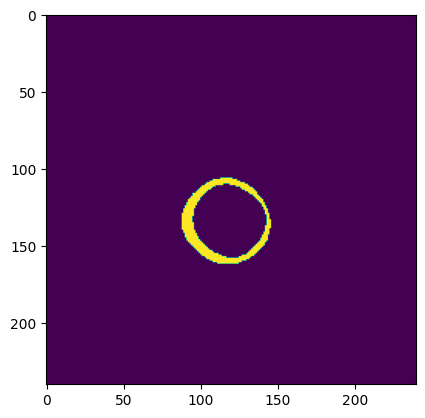

In [8]:
plt.imshow(data['mask'])

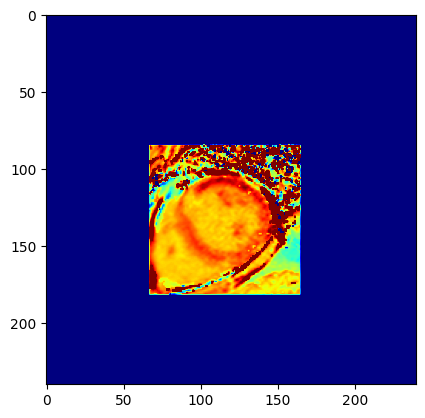

In [6]:
plt.imshow(data['T1'], vmin=0, vmax=800, cmap = 'jet')

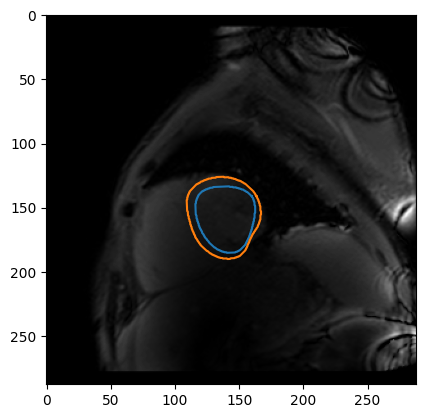

In [103]:
plt.imshow(data['volume'][:,:,1,3], cmap='gray')
x = [point[0] for point in contour2[1,0][0][0][0]]
y = [point[1] for point in contour2[1,0][0][0][0]]

# Plot the contour
plt.plot(x, y)

x = [point[0] for point in contour2[1,0][0][0][1]]
y = [point[1] for point in contour2[1,0][0][0][1]]

# Plot the contour
plt.plot(x, y)

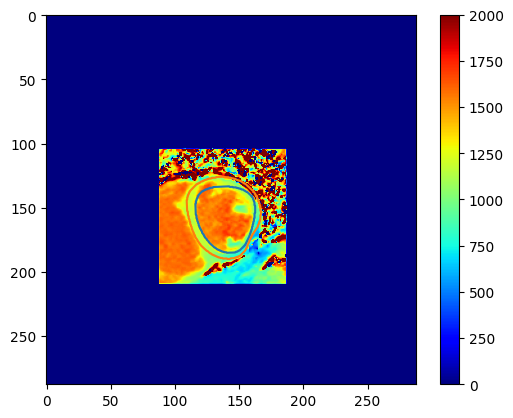

In [106]:
plt.imshow(data['T1'][:,:,1], cmap='jet', vmin=0, vmax=2000)
plt.colorbar()
x = [point[0] for point in contour2[1,0][0][0][0]]
y = [point[1] for point in contour2[1,0][0][0][0]]

# Plot the contour
plt.plot(x, y)

x = [point[0] for point in contour2[1,0][0][0][1]]
y = [point[1] for point in contour2[1,0][0][0][1]]

# Plot the contour
plt.plot(x, y)

In [17]:
data['tvec']

array([[ 132,  888, 1646,  241,  997, 1739,  350, 1201, 2019, 2810, 3574],
       [ 132,  880, 1648,  241, 1043, 1816,  350, 1088, 1820, 2693, 3564],
       [ 132,  902, 1737,  241, 1015, 1771,  350, 1088, 1898, 2687, 3521]],
      dtype=uint16)

In [65]:
contour2 = data['contour2']
contour2_org = data['contour2_org']

In [104]:
contour2

array([[array([[(array([[158.455824, 162.764144],
                       [158.95375 , 163.24064 ],
                       [158.951222, 163.737006],
                       [158.948647, 164.233179],
                       [158.946026, 164.729161],
                       [158.943354, 165.224952],
                       [158.940632, 165.720551],
                       [159.437474, 166.196422],
                       [159.434562, 166.691724],
                       [159.431595, 167.186835],
                       [159.428572, 167.681755],
                       [159.425492, 168.176483],
                       [159.422352, 168.67102 ],
                       [158.920023, 169.184376],
                       [158.916837, 169.678441],
                       [158.913586, 170.172313],
                       [158.91027 , 170.665995],
                       [158.407878, 171.178068],
                       [158.404507, 171.671304],
                       [157.902036, 172.182704],
                   

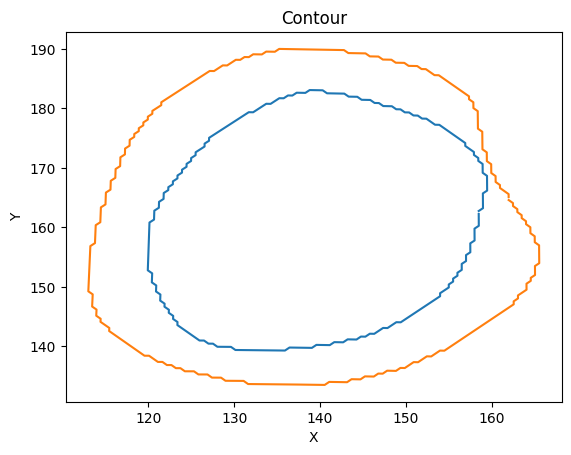

In [63]:
# Define the list of points
points = [[1,2],[2,3],[3,4],[4,5],[5,6]]

# Separate x and y coordinates into separate lists
x = [point[0] for point in contour2[0,0][0][0][0]]
y = [point[1] for point in contour2[0,0][0][0][0]]

# Plot the contour
plt.plot(x, y)

x = [point[0] for point in contour2[0,0][0][0][1]]
y = [point[1] for point in contour2[0,0][0][0][1]]

# Plot the contour
plt.plot(x, y)
# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour')

# Show the plot
plt.show()

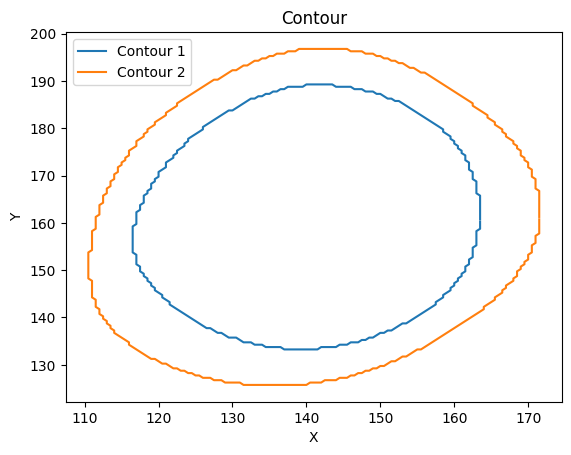

In [110]:
# Define the list of points
points = [[1,2],[2,3],[3,4],[4,5],[5,6]]

# Separate x and y coordinates into separate lists
x = [point[0] for point in contour2_org[2,0][0][0][0]]
y = [point[1] for point in contour2_org[2,0][0][0][0]]

# Plot the contour
plt.plot(x, y)

x = [point[0] for point in contour2_org[2,0][0][0][1]]
y = [point[1] for point in contour2_org[2,0][0][0][1]]

# Plot the contour
plt.plot(x, y)
# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour')
plt.legend(['Contour 1', 'Contour 2'])
# Show the plot
plt.show()

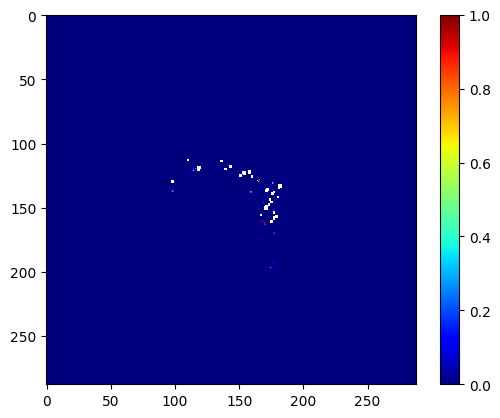

In [98]:
plt.imshow(data['sd_r'][:,:,0], cmap='jet',vmin = 0, vmax = 1)
plt.colorbar()

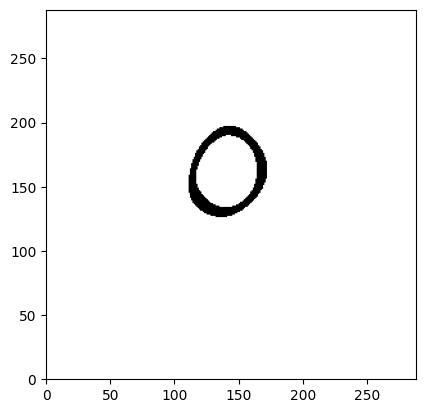

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path

# Define the two contour arrays
outer_contour = contour2_org[2,0][0][0][1]
inner_contour = contour2_org[2,0][0][0][0]

# Create a Path object for each contour
outer_path = Path(outer_contour)
inner_path = Path(inner_contour)

# Define the x and y arrays to create a grid
x = np.arange(0, 288, 1)
x.shape
y = np.arange(0, 288, 1)
xx, yy = np.meshgrid(x, y)

# Create an array of zeros
mask = np.zeros_like(xx)

points = np.column_stack([xx.ravel(), yy.ravel()])
outer_mask = outer_path.contains_points(points)
inner_mask = inner_path.contains_points(points)
mask = outer_mask & (~inner_mask)
mask = mask.reshape(xx.shape)

# Plot the result
plt.imshow(mask, origin='lower', extent=[0, 288, 0, 288], cmap='binary')
plt.show()